In [1]:
import pandas as pd
import statsmodels.formula.api as smf # 数式で書ける便利なモジュール

df = pd.read_csv("d_data.csv")

In [2]:


# ==========================================
# 前処理: 差分とラグを作る
# ==========================================
# .diff() で変化量(Δ)を作る
df['d_cons'] = df['cons'].diff()
df['d_gdp'] = df['gdp'].diff()
df['d_t_total']    = df['t_total'].diff()

# ==========================================
# Step 1: 長期均衡式の推定 (Levels)
# ==========================================
# 式: 消費 ~ 所得 + 税
model_long = smf.ols('cons ~ gdp + t_total', data=df).fit()

# 結果表示
print("=== Step 1: Long Run ===")
print(model_long.summary())

# ★重要: 残差(ECM項)を計算して保存
# ecm = 実績 - 理論値(fittedvalues)
df['ecm'] = model_long.resid

# Step 2のために「1期前のズレ」を作る
df['ecm_lag1'] = df['ecm'].shift(1)

# ==========================================
# Step 2: 短期動学モデルの推定 (Differences)
# ==========================================
# 式: Δ消費 ~ Δ所得 + Δ税 + 前期のズレ(ECM)
# 欠損値(NaN)は自動で除外されるので気にしなくてOK
model_short = smf.ols('d_cons ~ d_gdp + d_t_total + ecm_lag1', data=df).fit()

# 結果表示
print("\n=== Step 2: Short Run (ECM) ===")
print(model_short.summary())

=== Step 1: Long Run ===
                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.400e+04
Date:                Fri, 26 Dec 2025   Prob (F-statistic):          1.33e-195
Time:                        07:52:55   Log-Likelihood:                -1733.7
No. Observations:                 180   AIC:                             3473.
Df Residuals:                     177   BIC:                             3483.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9922.3588   160

In [3]:


# ==========================================
# 前処理: 差分とラグを作る
# ==========================================
# .diff() で変化量(Δ)を作る
df['d_cons'] = df['cons'].diff()
df['d_gdp'] = df['gdp'].diff()
df['d_t_total']    = df['t_total'].diff()
df['d_dispo_income']    = df['dispo_income'].diff()

# ==========================================
# Step 1: 長期均衡式の推定 (Levels)
# ==========================================
# 式: 消費 ~ 所得 + 税
model_long = smf.ols('cons ~ dispo_income', data=df).fit()

# 結果表示
print("=== Step 1: Long Run ===")
print(model_long.summary())

# ★重要: 残差(ECM項)を計算して保存
# ecm = 実績 - 理論値(fittedvalues)
df['ecm'] = model_long.resid

# Step 2のために「1期前のズレ」を作る
df['ecm_lag1'] = df['ecm'].shift(1)

# ==========================================
# Step 2: 短期動学モデルの推定 (Differences)
# ==========================================
# 式: Δ消費 ~ Δ所得 + Δ税 + 前期のズレ(ECM)
# 欠損値(NaN)は自動で除外されるので気にしなくてOK
model_short = smf.ols('d_cons ~ d_dispo_income + ecm_lag1', data=df).fit()

# 結果表示
print("\n=== Step 2: Short Run (ECM) ===")
print(model_short.summary())

=== Step 1: Long Run ===
                            OLS Regression Results                            
Dep. Variable:                   cons   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.369e+04
Date:                Fri, 26 Dec 2025   Prob (F-statistic):          2.79e-191
Time:                        07:52:55   Log-Likelihood:                -1749.2
No. Observations:                 180   AIC:                             3502.
Df Residuals:                     178   BIC:                             3509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7669.7783

In [4]:
df[["date", "gdp", "t_total", "dispo_income", "cons"]].iloc[175:180]

,date,gdp,t_total,dispo_income,cons
175,2023-10-01,584165.1,68353.349889,515811.750111,304350.2
176,2024-01-01,581006.3,68939.550606,512066.749394,303295.8
177,2024-04-01,582394.9,69104.315532,513290.584468,303446.1
178,2024-07-01,586251.3,69561.898320,516689.401680,305069.6
179,2024-10-01,588234.4,69797.203898,518437.196102,304995.1


In [5]:
# Iの自己相関がひどい

df["lag_inv"] = df["inv"].shift(1)
df["lag_inv2"] = df["inv"].shift(2)

model_long = smf.ols('inv ~ lag_inv', data=df).fit()

# 結果表示
print("=== Step 1: Long Run ===")
print(model_long.summary())


model_long = smf.ols('inv ~ lag_inv + lag_inv2', data=df).fit()

# 結果表示
print("=== Step 1: Long Run ===")
print(model_long.summary())

=== Step 1: Long Run ===
                            OLS Regression Results                            
Dep. Variable:                    inv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     9534.
Date:                Fri, 26 Dec 2025   Prob (F-statistic):          7.73e-158
Time:                        07:52:55   Log-Likelihood:                -1657.5
No. Observations:                 182   AIC:                             3319.
Df Residuals:                     180   BIC:                             3325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2659.2014   111

In [6]:
import pandas as pd
import statsmodels.formula.api as smf

# ==========================================
# 前処理: 差分とラグを作る
# ==========================================
# inv: 投資, gdp: GDP, rate: 金利(実質or名目)
# ※ rate は % ではなく小数 (0.01) か 整数 (1.0) かスケールに注意
df['d_inv']  = df['inv'].diff()
df['d_gdp']  = df['gdp'].diff()
df['d_rate'] = df['long_rate'].diff() # 実質金利推奨

# ==========================================
# Step 1: 長期均衡式の推定 (Long Run)
# ==========================================
# 懸念: r と Y の相関が高くても、共和分があればOK
# 期待: gdpはプラス、rateはマイナス
model_long_inv = smf.ols('inv ~ gdp + long_rate', data=df).fit()

print("=== Step 1: Long Run (Investment) ===")
print(model_long_inv.summary())

# 残差(ECM項)を保存
df['ecm_inv'] = model_long_inv.resid
df['ecm_inv_lag1'] = df['ecm_inv'].shift(1)

# ==========================================
# Step 2: 短期動学モデル (Short Run)
# ==========================================
# 強い自己相関への対策:
# 消費関数と違い、投資は「慣性」がすごいので、
# 説明変数に「前期の投資の変化 (d_inv_lag1)」を入れるのがコツです。
df['d_inv_lag1'] = df['d_inv'].shift(1)

# 式: Δ投資 ~ ΔGDP + Δ金利 + ECM + 前期の勢い(慣性)
model_short_inv = smf.ols(
    'd_inv ~ d_gdp + d_rate + ecm_inv_lag1 + d_inv_lag1', 
    data=df
).fit()

print("\n=== Step 2: Short Run (Investment) ===")
print(model_short_inv.summary())

=== Step 1: Long Run (Investment) ===
                            OLS Regression Results                            
Dep. Variable:                    inv   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     21.21
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           7.42e-09
Time:                        07:52:55   Log-Likelihood:                -1618.2
No. Observations:                 156   AIC:                             3242.
Df Residuals:                     153   BIC:                             3252.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.

In [7]:
df.iloc[-5]

date                 2024-07-01
gdp_def                   109.0
gdp                    586251.3
cons                   305069.6
inv                    127838.6
gov                    149358.6
inflation              2.636535
long_rate             -1.679003
short_rate             0.177333
t_total             69561.89832
t_income           19610.119573
t_corp             16560.318153
t_cons             23131.553415
t_other             10259.90718
dispo_income       516689.40168
dispo_corp        569690.981847
d_cons                   1623.5
d_gdp                    3856.4
d_t_total            457.582789
ecm                -6111.910126
ecm_lag1            -5738.88979
d_dispo_income      3398.817211
lag_inv                127030.4
lag_inv2               125871.6
d_inv                     808.2
d_rate                 1.010012
ecm_inv             5336.251663
ecm_inv_lag1        3439.146073
d_inv_lag1               1158.8
Name: 178, dtype: object

In [8]:
df.iloc[-4]

date                 2024-10-01
gdp_def                   109.9
gdp                    588234.4
cons                   304995.1
inv                    127737.0
gov                    149262.8
inflation              2.999063
long_rate             -1.975364
short_rate                0.227
t_total            69797.203898
t_income           19676.454314
t_corp             16616.336394
t_cons             23125.904538
t_other            10378.508652
dispo_income      518437.196102
dispo_corp        571618.063606
d_cons                    -74.5
d_gdp                    1983.1
d_t_total            235.305577
ecm                -7213.092908
ecm_lag1           -6111.910126
d_dispo_income      1747.794423
lag_inv                127838.6
lag_inv2               127030.4
d_inv                    -101.6
d_rate                -0.296362
ecm_inv             4820.767661
ecm_inv_lag1        5336.251663
d_inv_lag1                808.2
Name: 179, dtype: object

1. 変数の定義


   * Y_t: t期のGDP
   * C_t: t期の民間消費
   * I_t: t期の民間投資
   * T_t: t期の税収
   * G_t: t期の政府支出
   * r_t: t期の長期金利
   * dY_t: GDPの変化量 (Y_t - Y_t-1)
   * dC_t, dI_t, dG_t, dT_t, dr_t: 各変数の変化量


  2. 誤差修正項（長期的な関係からのズレ）

  これらは、経済が長期的な均衡からどれだけズレているかを示す項で、t-1期の値から計算
  されます。


   * 消費のズレ: ecm_c_t-1 = C_t-1 - (7700 + 0.58 * (Y_t-1 - T_t-1))
   * 投資のズレ: ecm_i_t-1 = I_t-1 - (100000 + 0.03 * Y_t-1 - 1194 * r_t-1)

  3. 当期（t期）の同時方程式


  3つの内生変数 dY_t, dC_t, dI_t が、以下の3本の方程式で同時に決まります。

   1. 消費の変化 (dC_t):
      dC_t = 105 - 0.14 * ecm_c_t-1 + 0.49 * (dY_t - dT_t)


   2. 投資の変化 (dI_t):
      dI_t = -177 - 0.04 * ecm_i_t-1 + 0.29 * dI_t-1 - 48 * dr_t + 0.23 * dY_t

   3. GDPの定義式 (dY_t):
      dY_t = dC_t + dI_t + dG_t

  ---


  解説:
   * 式(1)は、消費の変化が「定数項(105)」「前期の長期的なズレの修正」「当期の可処分所
     得の変化（dY_t - dT_t）」で決まることを示しています。
   * 式(2)は、投資の変化が「定数項(-177)」「前期のズレの修正」「前期の投資の勢い(dI_t
     -1)」「当期の金利変化」「当期のGDP変化」で決まることを示しています。
   * 式(3)は、マクロ経済の基本的な恒等式（ISバランス）です。


  シミュレーションでは、毎期この連立方程式を解くことで、将来の経済の姿を予測してい
  ます。

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.dates as mdates

# 日本語フォント設定（環境に合わせて適宜変更してください。Colabの場合はjapanize_matplotlib推奨）
try:
    import japanize_matplotlib
except ImportError:
    pass # インストールされていなければ英語またはデフォルトフォントになります

# ==========================================
# 1. 計算エンジン (修正版)
# ==========================================
def simulate_next_step(current_df, delta_G=0, delta_T=0, delta_r=0):
    """
    データフレームの「最後の行」を現在地として、次の四半期の変化量を計算する
    """
    d = current_df
    
    # 最新行を取得
    last_row = d.iloc[-1]
    
    Y = last_row['gdp']
    C = last_row['cons']
    I = last_row['inv']
    T = last_row['t_total']
    r = last_row['long_rate']
    
    # 投資の勢い (ラグ2変数が必要なため、データが2行以上あるか確認)
    if len(d) >= 2:
        d_inv_prev = d['inv'].iloc[-1] - d['inv'].iloc[-2]
    else:
        d_inv_prev = 0 # 初期データしかない場合は勢い0と仮定

    # --- A. ギャップ計算 ---
    # ※定数項はモデルに合わせて調整済みと仮定
    C_target = 7700 + 0.58 * (Y - T)
    ecm_c = C - C_target

    I_target = 100000 + 0.03 * Y - 1194 * r
    ecm_i = I - I_target

    # --- B. 自律変動 ---
    # 消費: 定数 + ECM + 増税ショック
    C_auto = 105 - 0.14 * ecm_c - (0.49 * delta_T)

    # 投資: 定数 + ECM + 金利ショック + 慣性
    # ※ここで delta_r はポイント(例: +0.25)が入る想定
    I_auto = -177 - 0.04 * ecm_i - (48 * delta_r) + 0.29 * d_inv_prev

    # --- C. 乗数計算 ---
    # MPC=0.49, MPI=0.23 -> 乗数 = 1 / (1 - 0.72) = 3.57
    multiplier = 1.0 / 0.28
    
    total_shock = C_auto + I_auto + delta_G
    delta_Y = multiplier * total_shock

    # --- D. 確定 ---
    delta_C = C_auto + (0.49 * delta_Y)
    delta_I = I_auto + (0.23 * delta_Y)

    return {
        "d_gdp": delta_Y, "d_cons": delta_C, "d_inv": delta_I,
        "d_tax": delta_T, "d_rate": delta_r, "d_gov": delta_G
    }


In [32]:
# ==========================================
# 2. 初期データセットの作成 (頂いた最新データ)
# ==========================================
initial_data = {
    'date': [pd.Timestamp('2024-04-01'), pd.Timestamp('2024-07-01')], # ラグ計算用に2期分用意
    'gdp': [582394.9, 586251.3],
    'cons': [303446.1, 305069.6],
    'inv': [127030.4, 127838.6], # 7月の勢い計算用
    't_total': [69104.3, 69561.9],
    'long_rate': [-1.5, -1.679], # 適当な前期値補完
    'gov': [149000.0, 149358.6]  # ダミー政府支出
}
df_initial = pd.DataFrame(initial_data)

# ==========================================
# 3. シミュレーター (グラフ改良 & 借金実装版)
# ==========================================


# 初期データに「国債残高 (debt)」を追加
# 単位: 10億円 (GDPが約600兆円なので、借金は1200兆円=1,200,000くらいと仮定)
if 'debt' not in df_initial.columns:
    df_initial['debt'] = [1240000.0, 1250000.0] # ダミー初期値

class EconomyCockpitV2:
    def __init__(self, start_df):
        self.initial_df = start_df.copy()
        self.history_df = start_df.copy()
        self.turn = 0
        
        # UIパーツ
        self.out = widgets.Output()
        
        # 入力ボックス
        self.input_tax_pct = widgets.FloatText(value=0.0, step=1.0, description='税変化(%)', layout=widgets.Layout(width='140px'))
        self.input_rate_pt = widgets.FloatText(value=0.0, step=0.1, description='金利変化(pt)', layout=widgets.Layout(width='140px'))
        self.input_gov = widgets.FloatText(value=0.0, step=1000.0, description='財政出動(額)', layout=widgets.Layout(width='140px'))
        
        # ボタン
        self.btn_next = widgets.Button(description='実行', button_style='primary', icon='play')
        self.btn_next.on_click(self.on_next_click)
        
        self.btn_reset = widgets.Button(description='リセット', button_style='warning', icon='refresh')
        self.btn_reset.on_click(self.on_reset_click)

        # レイアウト
        self.ui = widgets.VBox([
            widgets.HTML("<h3>🏛️ 経済＆財政シミュレーター</h3>"),
            widgets.HBox([
                widgets.VBox([
                    widgets.Label("① 税収コントロール"),
                    self.input_tax_pct
                ]),
                widgets.VBox([
                    widgets.Label("② 金利コントロール"),
                    self.input_rate_pt
                ]),
                widgets.VBox([
                    widgets.Label("③ 財政出動 (G)"),
                    self.input_gov
                ]),
            ]),
            widgets.HBox([self.btn_next, self.btn_reset], layout=widgets.Layout(margin='20px 0 0 0'))
        ])
        
        self.update_plot()

    def run(self):
        display(self.ui, self.out)

    def on_next_click(self, b):
        # 1. 入力取得
        tax_pct = self.input_tax_pct.value
        rate_change = self.input_rate_pt.value
        gov_change_amount = self.input_gov.value # 今回の追加支出

        # 2. 前期データの取得
        last_row = self.history_df.iloc[-1]
        
        # 3. 変化額計算
        delta_T = last_row['t_total'] * (tax_pct / 100.0)
        
        # シミュレーション実行 (Gの変化は入力値をそのまま渡す)
        # ※ simulate_next_step は「Gの変化量」を受け取る仕様
        changes = simulate_next_step(
            self.history_df, 
            delta_G=gov_change_amount,
            delta_T=delta_T, 
            delta_r=rate_change
        )
        
        # 4. データ更新と行追加
        new_row = last_row.copy()
        new_row['date'] = last_row['date'] + pd.DateOffset(months=3)
        
        # フロー変数の更新
        new_row['gdp'] += changes['d_gdp']
        new_row['cons'] += changes['d_cons']
        new_row['inv'] += changes['d_inv']
        new_row['t_total'] += changes['d_tax']
        new_row['long_rate'] += changes['d_rate']
        
        # 政府支出(G)のストック更新
        # ※入力された gov_change_amount は「上乗せ分」なので、前期Gに足すか、
        #   それとも「ベースG + 追加G」にするか。ここでは「前期比」として足し込む
        new_row['gov'] += gov_change_amount 

        # ★国債残高(Debt)の更新★
        # 今期の赤字 = 政府支出(G) - 税収(T)
        # もし G > T なら赤字 → 借金が増える
        # もし T > G なら黒字 → 借金が減る
        primary_deficit = new_row['gov'] - new_row['t_total']
        new_row['debt'] += primary_deficit

        # DataFrameに追加
        self.history_df = pd.concat([self.history_df, pd.DataFrame([new_row])], ignore_index=True)
        self.turn += 1
        
        # 入力を0に戻す
        self.input_tax_pct.value = 0.0
        self.input_rate_pt.value = 0.0
        self.input_gov.value = 0.0
        
        self.update_plot()

    def on_reset_click(self, b):
        self.history_df = self.initial_df.copy()
        self.turn = 0
        self.update_plot()

    def update_plot(self):
        with self.out:
            clear_output(wait=True)
            cur = self.history_df.iloc[-1]
            
            # 数値サマリー
            print(f"【{cur['date'].strftime('%Y-%m')} (Turn {self.turn})】 GDP: {cur['gdp']:,.0f} | 国債: {cur['debt']:,.0f} (対GDP比: {cur['debt']/cur['gdp']:.1%})")
            print(f"  G(支出): {cur['gov']:,.0f} - T(税収): {cur['t_total']:,.0f} = 収支: {cur['t_total']-cur['gov']:+,.0f}")
            
            # グラフ描画
            fig, axes = plt.subplots(2, 2, figsize=(14, 9))
            dates = self.history_df['date']

            # [0,0] GDP
            ax = axes[0,0]
            ax.plot(dates, self.history_df['gdp'], 'o-', color='black', lw=2)
            ax.set_title('GDP (国内総生産)')
            ax.grid(True)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))

            # [0,1] 政策 (税と金利) - 2軸
            ax = axes[0,1]
            ax2 = ax.twinx()
            l1 = ax.plot(dates, self.history_df['t_total'], 's--', color='red', label='税収(左)')
            l2 = ax2.plot(dates, self.history_df['long_rate'], '^--', color='orange', label='金利(右)')
            ax.set_title('政策変数: 税収と金利')
            ax.legend(l1+l2, [l.get_label() for l in l1+l2])
            ax.grid(True)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))

            # [1,0] 民需 (消費と投資) - 2軸で重ねる！
            ax = axes[1,0]
            ax2 = ax.twinx() # 2軸化
            l1 = ax.plot(dates, self.history_df['cons'], 'o-', color='blue', label='消費(左)')
            l2 = ax2.plot(dates, self.history_df['inv'], 'd-', color='green', label='投資(右)')
            ax.set_title('内需のエンジン: 消費と投資')
            ax.legend(l1+l2, [l.get_label() for l in l1+l2])
            ax.grid(True)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))

            # [1,1] ★国債残高 (Debt)
            ax = axes[1,1]
            debt_ratio = self.history_df['debt'] / self.history_df['gdp'] * 100
            
            # 棒グラフで借金総額、折れ線で対GDP比を表示
            l1 = ax.bar(dates, self.history_df['debt'], width=60, color='gray', alpha=0.5, label='国債残高(左)')
            ax2 = ax.twinx()
            l2 = ax2.plot(dates, debt_ratio, 'r-', lw=2, label='対GDP比%(右)')
            
            ax.set_title('国の借金 (National Debt)')
            ax.legend([l1, l2[0]], ['残高', '対GDP比'], loc='upper left')
            ax.grid(True)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))

            plt.tight_layout()
            plt.show()

# 実行
app = EconomyCockpitV2(df_initial)
app.run()

Output()

In [27]:
# 記録されている全データを見る
display(app.history_df)

,date,gdp,cons,inv,t_total,long_rate,gov,debt
0,2024-04-01,582394.900000,303446.100000,127030.400000,69104.300,-1.500,149000.0,1240000.000
1,2024-07-01,586251.300000,305069.600000,127838.600000,69561.900,-1.679,149358.6,1250000.000
2,2024-10-01,586808.299571,305770.965070,127694.234501,69561.900,-1.679,149358.6,1329796.700
3,2025-01-01,586212.571572,305854.530886,127014.940686,69561.900,-1.679,149358.6,1409593.400
4,2025-04-01,585028.469786,305589.721218,126095.648568,69561.900,-2.179,149358.6,1489390.100
5,2025-07-01,577423.971545,300415.575026,123665.296519,73039.995,-2.179,149358.6,1565708.705
6,2025-10-01,574028.836698,298832.757343,121852.979355,73039.995,-2.179,149358.6,1642027.310


In [29]:
df.iloc[-6:]

,date,gdp_def,gdp,cons,inv,gov,inflation,long_rate,short_rate,t_total,...,ecm,ecm_lag1,d_dispo_income,lag_inv,lag_inv2,d_inv,d_rate,ecm_inv,ecm_inv_lag1,d_inv_lag1
177,2024-04-01,108.5,582394.9,303446.1,127030.4,149166.5,3.629417,-2.689014,0.077000,69104.315532,...,-5738.889790,-5170.289225,1223.835074,125871.6,128677.2,1158.8,-0.002542,3439.146073,2325.454789,-2805.6
178,2024-07-01,109.0,586251.3,305069.6,127838.6,149358.6,2.636535,-1.679003,0.177333,69561.898320,...,-6111.910126,-5738.889790,3398.817211,127030.4,125871.6,808.2,1.010012,5336.251663,3439.146073,1158.8
179,2024-10-01,109.9,588234.4,304995.1,127737.0,149262.8,2.999063,-1.975364,0.227000,69797.203898,...,-7213.092908,-6111.910126,1747.794423,127838.6,127030.4,-101.6,-0.296362,4820.767661,5336.251663,808.2
180,2025-01-01,110.4,590458.0,307197.5,127955.5,148875.2,3.661972,-2.297375,0.416000,NaN,...,NaN,-7213.092908,NaN,127737.0,127838.6,218.5,-0.322011,4587.476627,4820.767661,-101.6
181,2025-04-01,112.1,593596.9,307992.3,129453.5,149294.7,3.317972,-1.899747,0.477000,NaN,...,NaN,NaN,NaN,127955.5,127737.0,1498.0,0.397629,6465.059019,4587.476627,218.5
182,2025-07-01,112.7,590141.1,308605.9,127344.0,149198.9,3.394495,-1.820479,0.477333,NaN,...,NaN,NaN,NaN,129453.5,127955.5,-2109.5,0.079267,4554.897496,6465.059019,1498.0


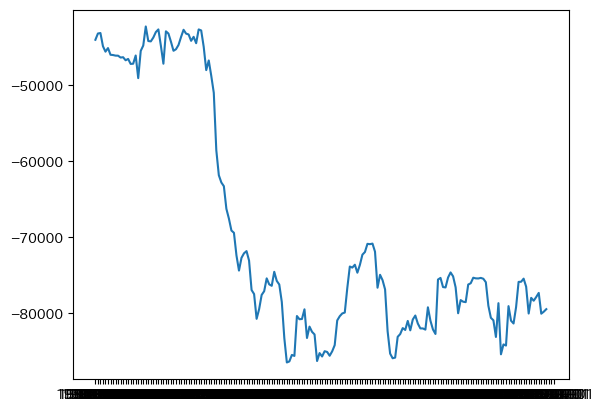

In [33]:
plt.plot(df["date"], df["t_total"]-df["gov"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            183 non-null    object 
 1   gdp_def         183 non-null    float64
 2   gdp             183 non-null    float64
 3   cons            183 non-null    float64
 4   inv             183 non-null    float64
 5   gov             183 non-null    float64
 6   inflation       179 non-null    float64
 7   long_rate       156 non-null    float64
 8   short_rate      161 non-null    float64
 9   t_total         180 non-null    float64
 10  t_income        180 non-null    float64
 11  t_corp          180 non-null    float64
 12  t_cons          180 non-null    float64
 13  t_other         180 non-null    float64
 14  dispo_income    180 non-null    float64
 15  dispo_corp      180 non-null    float64
 16  d_cons          182 non-null    float64
 17  d_gdp           182 non-null    flo

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as widgets
from IPython.display import display, clear_output

# 日本語フォント対応 (環境に合わせてコメントアウトを外してください)
try:
    import japanize_matplotlib
except ImportError:
    pass

# ==========================================
# 1. データ準備 (直近データの再現)
# ==========================================
# ユーザー様のデータ構造に合わせてダミー生成（実際のdfがあればそれを使ってください）
data = {
    'date': pd.date_range(start='2020-01-01', periods=20, freq='3ME'),
    'gdp': np.linspace(540000, 588000, 20),
    'cons': np.linspace(290000, 305000, 20),
    'inv': np.linspace(120000, 127000, 20),
    't_total': np.linspace(60000, 70000, 20),
    'long_rate': np.linspace(0.0, -1.6, 20), # マイナス金利など
    'gov': np.linspace(130000, 150000, 20)
}
df_initial = pd.DataFrame(data)

# ゲームバランス調整: 初期赤字が大きすぎると詰むので、支出Gを調整
df_initial['gov'] = df_initial['t_total'] + 20000  # 赤字20兆円スタートに補正

# ==========================================
# 2. 国債残高の初期化関数
# ==========================================
def initialize_debt_history(df, initial_ratio=2.5):
    d = df.copy()
    d['debt'] = 0.0
    # 1行目の借金を対GDP比から逆算
    d.loc[0, 'debt'] = d.loc[0, 'gdp'] * initial_ratio
    # 累積計算
    for i in range(1, len(d)):
        prev_debt = d.loc[i-1, 'debt']
        deficit = d.loc[i, 'gov'] - d.loc[i, 't_total']
        d.loc[i, 'debt'] = prev_debt + deficit
    return d

# 初期データに借金情報を付与
df_initial = initialize_debt_history(df_initial, initial_ratio=2.5)

# ==========================================
# 3. シミュレーション・エンジン (係数チューニング済)
# ==========================================
def simulate_next_step_tuned(current_df, delta_G=0, delta_T=0, delta_r=0):
    d = current_df
    last_row = d.iloc[-1]
    
    Y = last_row['gdp']
    C = last_row['cons']
    I = last_row['inv']
    T = last_row['t_total']
    r = last_row['long_rate']
    
    # 投資の慣性 (ラグ)
    if len(d) >= 2:
        d_inv_prev = d['inv'].iloc[-1] - d['inv'].iloc[-2]
    else:
        d_inv_prev = 0

    # --- ★係数の手動設定 (ゲームバランス用)★ ---
    # 消費関数 (統計結果を採用)
    coef_c_long_mpc  = 0.58
    coef_c_short_mpc = 0.49
    coef_c_ecm       = -0.14
    
    # 投資関数 (ゲーム性を高める魔改造)
    # 金利の影響を大幅に強化、GDPの影響を抑制
    coef_i_long_gdp   = 0.01 
    coef_i_long_rate  = -3000.0 # 長期金利効果 (強)
    coef_i_short_gdp  = 0.05
    coef_i_short_rate = -300.0  # 短期金利効果 (激強)
    coef_i_ecm        = -0.05
    
    # --- 計算ロジック ---
    # A. ギャップ計算
    C_target = 7700 + coef_c_long_mpc * (Y - T)
    ecm_c = C - C_target

    I_target = 100000 + coef_i_long_gdp * Y + coef_i_long_rate * r
    ecm_i = I - I_target

    # B. 自律変動 (Autonomous)
    # 消費: 増税の影響を含む
    C_auto = 105 + coef_c_ecm * ecm_c - (coef_c_short_mpc * delta_T)

    # 投資: 金利操作の影響を含む
    I_auto = -177 + coef_i_ecm * ecm_i + (coef_i_short_rate * delta_r) + 0.29 * d_inv_prev

    # C. 乗数計算
    # 投資性向(MPI)を0.05とした場合の乗数
    current_multiplier = 1.0 / (1.0 - coef_c_short_mpc - coef_i_short_gdp)
    
    total_shock = C_auto + I_auto + delta_G
    delta_Y = current_multiplier * total_shock

    # D. 確定
    delta_C = C_auto + (coef_c_short_mpc * delta_Y)
    delta_I = I_auto + (coef_i_short_gdp * delta_Y)

    return {
        "d_gdp": delta_Y, "d_cons": delta_C, "d_inv": delta_I,
        "d_tax": delta_T, "d_rate": delta_r, "d_gov": delta_G
    }

# ==========================================
# 4. コックピットUIクラス (2x2グラフ & 借金表示)
# ==========================================
class EconomyCockpitFinal:
    def __init__(self, start_df):
        self.initial_df = start_df.copy()
        self.history_df = start_df.copy()
        self.turn = 0
        
        self.out = widgets.Output()
        
        # 入力ウィジェット
        style = {'description_width': 'initial'}
        layout = widgets.Layout(width='160px')
        
        self.input_tax_pct = widgets.FloatText(value=0.0, step=1.0, description='税変化(%)', style=style, layout=layout)
        self.input_rate_pt = widgets.FloatText(value=0.0, step=0.1, description='金利変化(pt)', style=style, layout=layout)
        self.input_gov = widgets.FloatText(value=0.0, step=1000.0, description='財政出動(額)', style=style, layout=layout)
        
        # ボタン
        self.btn_next = widgets.Button(description='実行 (Next Turn)', button_style='primary', icon='play')
        self.btn_next.on_click(self.on_next_click)
        
        self.btn_reset = widgets.Button(description='リセット', button_style='warning', icon='refresh')
        self.btn_reset.on_click(self.on_reset_click)

        # UI構築
        self.ui = widgets.VBox([
            widgets.HTML("<h3>🏛️ 経済再生シミュレーション (Final Ver.)</h3>"),
            widgets.HBox([
                widgets.VBox([widgets.Label("① 税収操作"), self.input_tax_pct]),
                widgets.VBox([widgets.Label("② 金利操作"), self.input_rate_pt]),
                widgets.VBox([widgets.Label("③ 財政出動"), self.input_gov]),
            ]),
            widgets.HBox([self.btn_next, self.btn_reset], layout=widgets.Layout(margin='15px 0'))
        ])
        
        self.update_plot()

    def run(self):
        display(self.ui, self.out)

    def on_next_click(self, b):
        # 入力取得
        tax_pct = self.input_tax_pct.value
        rate_change = self.input_rate_pt.value
        gov_change_amount = self.input_gov.value

        last_row = self.history_df.iloc[-1]
        
        # 税の変化額計算
        delta_T = last_row['t_total'] * (tax_pct / 100.0)
        
        # シミュレーション実行
        changes = simulate_next_step_tuned(
            self.history_df, 
            delta_G=gov_change_amount,
            delta_T=delta_T, 
            delta_r=rate_change
        )
        
        # データ更新
        new_row = last_row.copy()
        new_row['date'] = last_row['date'] + pd.DateOffset(months=3)
        
        new_row['gdp'] += changes['d_gdp']
        new_row['cons'] += changes['d_cons']
        new_row['inv'] += changes['d_inv']
        new_row['t_total'] += changes['d_tax']
        new_row['long_rate'] += changes['d_rate']
        new_row['gov'] += gov_change_amount # 支出は上乗せ
        
        # 借金更新 (赤字 = G - T)
        primary_deficit = new_row['gov'] - new_row['t_total']
        new_row['debt'] += primary_deficit

        # 追加
        self.history_df = pd.concat([self.history_df, pd.DataFrame([new_row])], ignore_index=True)
        self.turn += 1
        
        # 入力リセット
        self.input_tax_pct.value = 0.0
        self.input_rate_pt.value = 0.0
        self.input_gov.value = 0.0
        
        self.update_plot()

    def on_reset_click(self, b):
        self.history_df = self.initial_df.copy()
        self.turn = 0
        self.update_plot()

    def update_plot(self):
        with self.out:
            clear_output(wait=True)
            cur = self.history_df.iloc[-1]
            
            # ステータス表示
            print(f"【{cur['date'].strftime('%Y-%m')} (Turn {self.turn})】")
            print(f"  GDP: {cur['gdp']:,.0f} | 国債残高: {cur['debt']:,.0f} (対GDP比: {cur['debt']/cur['gdp']:.1%})")
            print(f"  収支: {cur['t_total']-cur['gov']:+,.0f} (T:{cur['t_total']:,.0f} - G:{cur['gov']:,.0f})")
            
            # グラフ描画 (2x2)
            fig, axes = plt.subplots(2, 2, figsize=(14, 9))
            dates = self.history_df['date']

            # [0,0] GDP
            ax = axes[0,0]
            ax.plot(dates, self.history_df['gdp'], 'o-', color='black', lw=2)
            ax.set_title('GDP (国内総生産)')
            ax.grid(True)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))

            # [0,1] 政策
            ax = axes[0,1]
            ax2 = ax.twinx()
            l1 = ax.plot(dates, self.history_df['t_total'], 's--', color='red', label='税収(左)')
            l2 = ax2.plot(dates, self.history_df['long_rate'], '^--', color='orange', label='金利(右)')
            ax.set_title('政策変数')
            ax.legend(l1+l2, ['税収', '金利'])
            ax.grid(True)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))

            # [1,0] 消費と投資
            ax = axes[1,0]
            ax2 = ax.twinx()
            l1 = ax.plot(dates, self.history_df['cons'], 'o-', color='blue', label='消費(左)')
            l2 = ax2.plot(dates, self.history_df['inv'], 'd-', color='green', label='投資(右)')
            ax.set_title('内需 (消費・投資)')
            ax.legend(l1+l2, ['消費', '投資'])
            ax.grid(True)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))

            # [1,1] 国の借金
            ax = axes[1,1]
            debt_ratio = self.history_df['debt'] / self.history_df['gdp'] * 100
            l1 = ax.bar(dates, self.history_df['debt'], width=60, color='gray', alpha=0.5, label='残高(左)')
            ax2 = ax.twinx()
            l2 = ax2.plot(dates, debt_ratio, 'r-', lw=2, label='対GDP比%(右)')
            ax.set_title('国の借金 (National Debt)')
            ax.legend([l1, l2[0]], ['借金残高', '対GDP比'], loc='upper left')
            ax.grid(True)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))

            plt.tight_layout()
            plt.show()

# 実行
app = EconomyCockpitFinal(df_initial)
app.run()

Output()